In [157]:
import os
from PyPDF2 import PdfFileReader, PdfFileWriter

In [158]:
pdf_path = 'ED_8_PETROBRAS_PSP1_2021_RES_FINAL_OBJ_CONV_TITULOS.PDF'

with open(pdf_path, 'rb') as f:
    pdf = PdfFileReader(f)
    information = pdf.getDocumentInfo()
    number_of_pages = pdf.getNumPages()

txt = f"""
Information about {pdf_path}: 

Author: {information.author}
Creator: {information.creator}
Producer: {information.producer}
Subject: {information.subject}
Title: {information.title}
Number of pages: {number_of_pages}
"""

print(txt)


Information about ED_8_PETROBRAS_PSP1_2021_RES_FINAL_OBJ_CONV_TITULOS.PDF: 

Author: Crisana de Souza Correia
Creator: Microsoft® Word 2016
Producer: Microsoft® Word 2016
Subject: None
Title: None
Number of pages: 541



In [159]:
 def split(path, name_of_split,range_pdf):
    
    pdf = PdfFileReader(path)
    pdf_writer = PdfFileWriter()

    for page in range_pdf:

        pdf_writer.addPage(pdf.getPage(page))

        output = f'{name_of_split}.pdf'

    with open(output, 'wb') as output_pdf:
        pdf_writer.write(output_pdf)


In [160]:
path = 'ED_8_PETROBRAS_PSP1_2021_RES_FINAL_OBJ_CONV_TITULOS.PDF'
name_of_split = 'Enfase DS'
range_pdf = range(119,143)

split(path, name_of_split,range_pdf)


In [161]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [162]:
pdfFileObj = open('Enfase DS.PDF','rb')
pdfReader = PdfFileReader(pdfFileObj)

num_pages = pdfReader.numPages
count = 0
text = ""

In [163]:
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()

In [164]:
text =  text.replace('\n','')[1:]
linhas = text.split('1.1.7.1')[0]
linhas = linhas.split('/')[1:]

In [165]:
exp = 'número de inscrição, nome do candidato em ordem alfabética, nota final na prova objetiva de conhecimentos básicos (P1), número de acertos na prova objetiva de conhecimentos básicos (P1), nota final na prova objetiva de conhecimentos específicos (P2), número de acertos na prova objetiva de conhecimentos específicos (P2), nota final no bloco 1 da prova objetiva de conhecimentos específicos (P2), nota final no bloco 2 da prova objetiva de conhecimentos específicos (P2), nota final no bloco 3 da prova objetiva de conhecimentos específicos (P2) e nota final nas provas objetivas'
headers = exp.replace(' e nota',',').split(', ')
headers

['número de inscrição',
 'nome do candidato em ordem alfabética',
 'nota final na prova objetiva de conhecimentos básicos (P1)',
 'número de acertos na prova objetiva de conhecimentos básicos (P1)',
 'nota final na prova objetiva de conhecimentos específicos (P2)',
 'número de acertos na prova objetiva de conhecimentos específicos (P2)',
 'nota final no bloco 1 da prova objetiva de conhecimentos específicos (P2)',
 'nota final no bloco 2 da prova objetiva de conhecimentos específicos (P2)',
 'nota final no bloco 3 da prova objetiva de conhecimentos específicos (P2)',
 'final nas provas objetivas']

In [166]:
import pandas as pd
import numpy as np

def converter(a):
    try:
        return float(a)
    except:
        return np.nan

df = pd.DataFrame(linhas,columns = ['Origin'])   

for i in range(len(headers)):
    df[headers[i]] = df['Origin'].apply(lambda x: x.split(',')[i])

for i in range(len(headers)):
    if i > 1:
        df[headers[i]] = df[headers[i]].apply(lambda x : converter(x)) 

df.head()

,Origin,número de inscrição,nome do candidato em ordem alfabética,nota final na prova objetiva de conhecimentos básicos (P1),número de acertos na prova objetiva de conhecimentos básicos (P1),nota final na prova objetiva de conhecimentos específicos (P2),número de acertos na prova objetiva de conhecimentos específicos (P2),nota final no bloco 1 da prova objetiva de conhecimentos específicos (P2),nota final no bloco 2 da prova objetiva de conhecimentos específicos (P2),nota final no bloco 3 da prova objetiva de conhecimentos específicos (P2),final nas provas objetivas
0,"10203083, Abrahao do Nascimento Guimaraes, 25...",10203083,Abrahao do Nascimento Guimaraes,25.0,37.0,27.0,46.0,12.0,5.0,10.0,52.0
1,"10080752, Abrhaao Ribeiro, 26.00, 38, 32.00, ...",10080752,Abrhaao Ribeiro,26.0,38.0,32.0,51.0,14.0,9.0,9.0,58.0
2,"10061411, Adailton Almeida Oliveira Junior, 3...",10061411,Adailton Almeida Oliveira Junior,30.0,36.0,21.0,26.0,10.0,6.0,5.0,51.0
3,"10062454, Adben Jomil Trevizoli de Carvalho, ...",10062454,Adben Jomil Trevizoli de Carvalho,25.0,36.0,24.0,39.0,9.0,12.0,3.0,49.0
4,"10191929, Adelmo Rodrigues de Barros Junior, ...",10191929,Adelmo Rodrigues de Barros Junior,14.0,32.0,28.0,48.0,16.0,11.0,1.0,42.0


In [167]:
df.describe()

,nota final na prova objetiva de conhecimentos básicos (P1),número de acertos na prova objetiva de conhecimentos básicos (P1),nota final na prova objetiva de conhecimentos específicos (P2),número de acertos na prova objetiva de conhecimentos específicos (P2),nota final no bloco 1 da prova objetiva de conhecimentos específicos (P2),nota final no bloco 2 da prova objetiva de conhecimentos específicos (P2),nota final no bloco 3 da prova objetiva de conhecimentos específicos (P2),final nas provas objetivas
count,1618.000000,1619.000000,1620.000000,1619.000000,1619.000000,1619.000000,1618.000000,1614.000000
mean,25.495056,35.960469,28.731481,42.988264,13.885114,7.811612,7.032756,54.214374
std,6.885245,4.667926,6.241495,6.443382,3.800708,3.290202,3.591826,10.703228
min,10.000000,16.000000,21.000000,24.000000,2.000000,-3.000000,-3.000000,36.000000
25%,20.000000,33.000000,24.000000,38.000000,11.000000,5.000000,5.000000,46.000000
50%,26.000000,36.000000,27.000000,43.000000,14.000000,8.000000,7.000000,53.000000
75%,30.000000,39.000000,32.000000,48.000000,16.000000,10.000000,9.000000,61.000000
max,46.000000,48.000000,54.000000,62.000000,26.000000,17.000000,19.000000,93.000000


In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

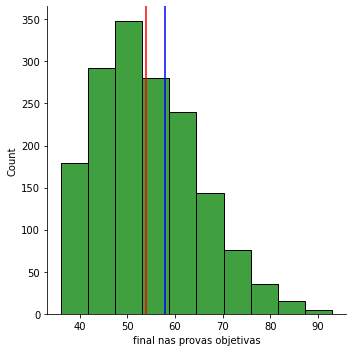

In [195]:
sns.displot(df['final nas provas objetivas'],bins = 10 , color = 'Green')
plt.axvline(54,c = 'red')
plt.axvline(58,c = 'blue')

In [173]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
